In [2]:
import pandas as pd

In [3]:
import numpy as np

In [4]:
import statistics

In [5]:
import math

In [6]:
import random

In [7]:
df_BwayWheels_TripData_Mar20=pd.read_csv("/resources/BayWheels_Station_Clustering_Project/Data/202003-baywheels-tripdata.csv")

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (17) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [8]:
df_BwayWheels_TripData_Mar20.drop(['rental_access_method'], axis=1, inplace=True)

In [9]:
df_BwayWheels_TripData_Mar20.head()

,duration_sec,start_date_formatted,start_time_formatted,start_time,end_date_formatted,end_time_formatted,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type
0,35187,3/31/2020,8:42:10 PM,42:10.1,4/1/2020,6:28:38 AM,28:37.8,462.0,Cruise Terminal at Pier 27,37.804648,-122.402087,24.0,Spear St at Folsom St,37.789677,-122.390428,10982,Customer
1,14568,3/31/2020,10:45:26 PM,45:25.5,4/1/2020,2:48:14 AM,48:13.8,42.0,San Francisco City Hall (Polk St at Grove St),37.778650,-122.418230,370.0,Jones St at Post St,37.787327,-122.413278,12617,Customer
2,35990,3/31/2020,3:08:22 PM,08:22.3,4/1/2020,1:08:13 AM,08:13.0,391.0,1st St at Younger Ave,37.355030,-121.904436,397.0,Gish Rd at 1st St,37.361867,-121.909315,12812,Customer
3,1068,3/31/2020,11:55:00 PM,55:00.4,4/1/2020,12:12:49 AM,12:49.0,456.0,Arguello Blvd at Geary Blvd,37.781468,-122.458806,107.0,17th St at Dolores St,37.763015,-122.426497,12955,Customer
4,3300,3/31/2020,11:00:56 PM,00:55.6,3/31/2020,11:55:57 PM,55:56.6,6.0,The Embarcadero at Sansome St,37.804770,-122.403234,24.0,Spear St at Folsom St,37.789677,-122.390428,13050,Customer


In [10]:
df_BwayWheels_TripData_Mar20_Station_Lat_long=df_BwayWheels_TripData_Mar20[['start_station_id','start_station_name','start_station_latitude','start_station_longitude']]

In [11]:
df_BwayWheels_TripData_Mar20_Station_Lat_long.shape

(176799, 4)

In [12]:
df_BwayWheels_TripData_Mar20_Station_Lat_long.dropna(inplace=True)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [13]:
stations=df_BwayWheels_TripData_Mar20_Station_Lat_long['start_station_id'].unique()

In [14]:
stations=np.sort(stations)

In [15]:
BayWheelsStations_lat_lon=pd.DataFrame(stations)

In [16]:
BayWheelsStations_lat_lon.columns=['Station ID']

In [17]:
BayWheelsStations_lat_lon.head()

,Station ID
0,3.0
1,4.0
2,5.0
3,6.0
4,7.0


In [18]:
for i in range(0,len(BayWheelsStations_lat_lon)):
    for j in range(0,len(df_BwayWheels_TripData_Mar20)):
        if df_BwayWheels_TripData_Mar20.loc[j,'start_station_id']==BayWheelsStations_lat_lon.loc[i,'Station ID']:
            BayWheelsStations_lat_lon.loc[i,'Station Name']= df_BwayWheels_TripData_Mar20.loc[j,'start_station_name']
            BayWheelsStations_lat_lon.loc[i,'Station Latitude']= df_BwayWheels_TripData_Mar20.loc[j,'start_station_latitude']
            BayWheelsStations_lat_lon.loc[i,'Station Longitude']= df_BwayWheels_TripData_Mar20.loc[j,'start_station_longitude']
            break

In [19]:
indextoRemove=BayWheelsStations_lat_lon[BayWheelsStations_lat_lon['Station Latitude']==0]

In [20]:
%%capture
BayWheelsStations_lat_lon.drop(indextoRemove.index, axis=0, inplace=True)

In [21]:
BayWheelsStations_lat_lon.reset_index(drop=True)

,Station ID,Station Name,Station Latitude,Station Longitude
0,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904
1,4.0,Cyril Magnin St at Ellis St,37.785881,-122.408915
2,5.0,Powell St BART Station (Market St at 5th St),37.783899,-122.408445
3,6.0,The Embarcadero at Sansome St,37.804770,-122.403234
4,7.0,Frank H Ogawa Plaza,37.804562,-122.271738
...,...,...,...,...
437,516.0,Clement St at 32nd Ave,37.781722,-122.492844
438,517.0,Spruce St at California St,37.786578,-122.453423
439,518.0,22nd St at Potrero Ave,37.756808,-122.405943
440,520.0,23rd Ave at Clement St,37.781990,-122.482807


In [22]:
BayWheelsStations_lat_lon.head()

,Station ID,Station Name,Station Latitude,Station Longitude
0,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904
1,4.0,Cyril Magnin St at Ellis St,37.785881,-122.408915
2,5.0,Powell St BART Station (Market St at 5th St),37.783899,-122.408445
3,6.0,The Embarcadero at Sansome St,37.804770,-122.403234
4,7.0,Frank H Ogawa Plaza,37.804562,-122.271738


In [23]:
BayWheelsStations_lat_lon.tail()

,Station ID,Station Name,Station Latitude,Station Longitude
438,516.0,Clement St at 32nd Ave,37.781722,-122.492844
439,517.0,Spruce St at California St,37.786578,-122.453423
440,518.0,22nd St at Potrero Ave,37.756808,-122.405943
441,520.0,23rd Ave at Clement St,37.781990,-122.482807
442,521.0,48th Ave at Cabrillo St,37.772954,-122.509071


## Creating a Map of San Francisco and Bay Wheels stations superimposed 

In [24]:
%%capture
!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

In [25]:
address = 'San Francisco, California'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of San Francisco are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of San Francisco are 37.7790262, -122.4199061.


In [26]:
import folium

In [27]:
# create map of New York using latitude and longitude values
map_SanFrancisco = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, stationID, stationName in zip(BayWheelsStations_lat_lon['Station Latitude'],BayWheelsStations_lat_lon['Station Longitude']\
                                            ,BayWheelsStations_lat_lon['Station ID'],BayWheelsStations_lat_lon['Station Name']):
    label = '{},{}'.format(stationID, stationName)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_SanFrancisco)  
    
map_SanFrancisco

## Segmentation/Clustering of Bay Wheels Stations

### Foursquare API Credentials

In [28]:
CLIENT_ID = 'YSHJZKEA0LMOAKB4RGUGSPNJDIP3PWKC232SCFBKFEIBWDAD' # your Foursquare ID
CLIENT_SECRET = 'OBZHMIJVOVU0BUQ5X1NIS44V5XIPPFZF34WUEXEGCIZ1Z5BY' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: YSHJZKEA0LMOAKB4RGUGSPNJDIP3PWKC232SCFBKFEIBWDAD
CLIENT_SECRET:OBZHMIJVOVU0BUQ5X1NIS44V5XIPPFZF34WUEXEGCIZ1Z5BY


In [29]:
import requests 

In [30]:
LIMIT=100

In [31]:
def getNearbyVenues(stationIDs, latitudes, longitudes, radius=150):
    
    venues_list=[]
    for stationID, lat, lng in zip(stationIDs, latitudes, longitudes):
       # print(postalCodes)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            stationID, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Station ID', 
                  'Station Latitude', 
                  'Station Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [32]:
# Obtaining venues around each Station
Stations_venues = getNearbyVenues(stationIDs=BayWheelsStations_lat_lon['Station ID'],
                                   latitudes=BayWheelsStations_lat_lon['Station Latitude'],
                                   longitudes=BayWheelsStations_lat_lon['Station Longitude']
                                  )


### Analyzing Each Station 

In [33]:
# one hot encoding
StationID_onehot = pd.get_dummies(Stations_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
StationID_onehot['Station ID'] = Stations_venues['Station ID'] 

# move neighborhood column to the first column
fixed_columns = [StationID_onehot.columns[-1]] + list(StationID_onehot.columns[:-1])
StationID_onehot = StationID_onehot[fixed_columns]

StationID_onehot.head()

,Station ID,ATM,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,American Restaurant,Antique Shop,Arcade,Argentinian Restaurant,...,Warehouse Store,Watch Shop,Weight Loss Center,Whisky Bar,Wine Bar,Wine Shop,Winery,Wings Joint,Women's Store,Yoga Studio
0,3.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
StationID_grouped=StationID_onehot.groupby('Station ID').mean().reset_index()

In [35]:
StationID_grouped.head()

,Station ID,ATM,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,American Restaurant,Antique Shop,Arcade,Argentinian Restaurant,...,Warehouse Store,Watch Shop,Weight Loss Center,Whisky Bar,Wine Bar,Wine Shop,Winery,Wings Joint,Women's Store,Yoga Studio
0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
1,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.090909,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
2,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
3,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.041667,0.0,0.0,0.0,0.0,0.041667
4,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000


In [36]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [37]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Station ID']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
Stations_venues_sorted = pd.DataFrame(columns=columns)
Stations_venues_sorted['Station ID'] = StationID_grouped['Station ID']

for ind in np.arange(StationID_grouped.shape[0]):
    Stations_venues_sorted.iloc[ind, 1:] = return_most_common_venues(StationID_grouped.iloc[ind, :], num_top_venues)

Stations_venues_sorted.head()

,Station ID,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,3.0,Hotel,Burger Joint,Pedestrian Plaza,Museum,Furniture / Home Store,North Indian Restaurant,Lounge,Coffee Shop,Grocery Store,Gym
1,4.0,Cosmetics Shop,Clothing Store,Hostel,Middle Eastern Restaurant,Pharmacy,Jazz Club,Watch Shop,Mobile Phone Shop,Hotel,Bubble Tea Shop
2,5.0,Movie Theater,Japanese Restaurant,Clothing Store,Sandwich Place,Cosmetics Shop,Toy / Game Store,Cable Car,Mobile Phone Shop,Lounge,Plaza
3,7.0,Coffee Shop,Sandwich Place,Bar,Bagel Shop,Yoga Studio,Juice Bar,Clothing Store,Chinese Restaurant,Monument / Landmark,Mobile Phone Shop
4,8.0,Street Food Gathering,Food Truck,Gift Shop,Science Museum,Café,Exhibit,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant


# Station Clustering

In [38]:
from sklearn.cluster import KMeans

### The Elbow Method to Determine Optimal K

In [39]:
#Eaclidean distance function from scipy
from scipy.spatial import distance

In [40]:
from sklearn.metrics import silhouette_score

In [41]:
StationID_grouped_clustering = StationID_grouped.drop('Station ID', 1)

In [42]:
Sample=StationID_grouped_clustering

In [43]:
kMax=15

In [44]:
# function returning distances between each point and its assigned cluster center
def Total_Distance_fromCentroids_and_Silhouette_Score(Sample, kMax):
  tot_dist = []
  sil = []
  kmeans_List=[]
  #kmeans_List_cluster_centers=[]

  for k in range(1, kMax+1):
    kmeans = KMeans(n_clusters = k, random_state=0).fit(Sample) # , random_state=0
    centroids = kmeans.cluster_centers_
    kmeans_List.append(kmeans)
    
    if k != 1:
        labels = kmeans.labels_
        sil.append(silhouette_score(StationID_grouped_clustering, labels, metric = 'euclidean'))

    pred_clusters = kmeans.predict(Sample)
    curr_tot_dist = 0
    
    # calculate Euclidean distance of each point from its cluster center
    for i in range(len(Sample)):
      curr_clusterCenter = centroids[pred_clusters[i]]
      curr_tot_dist += distance.euclidean(Sample.iloc[i,], curr_clusterCenter)
      
    tot_dist.append(curr_tot_dist)
    
  return tot_dist,sil, kmeans_List

In [45]:
random.seed(100)

In [46]:
y_tot_dist, y_sil, kmeans_List=Total_Distance_fromCentroids_and_Silhouette_Score(Sample, kMax)

In [47]:
import matplotlib.pyplot as plt

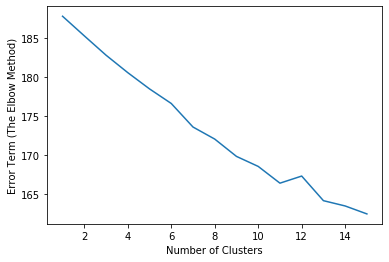

In [48]:
plt.plot(range(1, kMax+1),y_tot_dist)
plt.xlabel('Number of Clusters')
plt.ylabel('Error Term (The Elbow Method)')
plt.show()

## Silhouette Method

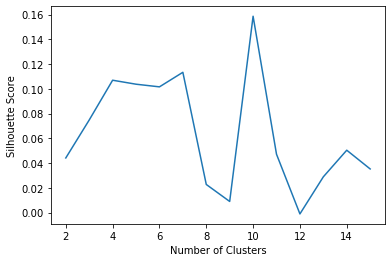

In [49]:
plt.plot(range(2, kMax+1),y_sil)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

## Optimal number of clusters

K = 10 is selected as the optimal number of clusters.

In [50]:
# set number of clusters
kclusters = 10
kmeans = kmeans_List[9]

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1], dtype=int32)

In [52]:
#Stations_venues_sorted.drop(['Cluster Labels'], axis=1, inplace=True)

In [53]:
# Including cluster lables
Stations_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

In [54]:
StationClustering_merged=pd.merge(BayWheelsStations_lat_lon,Stations_venues_sorted, on='Station ID')

In [55]:
StationClustering_merged.head(5)

,Station ID,Station Name,Station Latitude,Station Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,1,Hotel,Burger Joint,Pedestrian Plaza,Museum,Furniture / Home Store,North Indian Restaurant,Lounge,Coffee Shop,Grocery Store,Gym
1,4.0,Cyril Magnin St at Ellis St,37.785881,-122.408915,1,Cosmetics Shop,Clothing Store,Hostel,Middle Eastern Restaurant,Pharmacy,Jazz Club,Watch Shop,Mobile Phone Shop,Hotel,Bubble Tea Shop
2,5.0,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,1,Movie Theater,Japanese Restaurant,Clothing Store,Sandwich Place,Cosmetics Shop,Toy / Game Store,Cable Car,Mobile Phone Shop,Lounge,Plaza
3,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,1,Coffee Shop,Sandwich Place,Bar,Bagel Shop,Yoga Studio,Juice Bar,Clothing Store,Chinese Restaurant,Monument / Landmark,Mobile Phone Shop
4,8.0,The Embarcadero at Vallejo St,37.799953,-122.398525,1,Street Food Gathering,Food Truck,Gift Shop,Science Museum,Café,Exhibit,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant


## Visualization of The Clusters (*K = 10*)

In [56]:
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

In [57]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(StationClustering_merged['Station Latitude'], StationClustering_merged['Station Longitude'],\
                                  StationClustering_merged['Station ID'], StationClustering_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## Examine Clusters

### Cluster 1

#### Naming the cluster: *The diverse Cluster (?)*

In [58]:
Explore_Cluster_1 = StationClustering_merged.loc[StationClustering_merged['Cluster Labels'] == 0, StationClustering_merged.columns[[1] + list(range(5, StationClustering_merged.shape[1]))]]

In [59]:
Explore_Cluster_1.shape

(21, 11)

In [60]:
(round(Explore_Cluster_1['1st Most Common Venue'].value_counts(1)*100,2)).to_frame().head(5)

,1st Most Common Venue
Park,19.05
Sports Bar,9.52
Pool,9.52
Furniture / Home Store,9.52
Paper / Office Supplies Store,4.76


In [61]:
(round(Explore_Cluster_1['2nd Most Common Venue'].value_counts(1)*100,2)).to_frame().head(5)

,2nd Most Common Venue
Park,33.33
Chinese Restaurant,4.76
Bus Station,4.76
Street Art,4.76
Cosmetics Shop,4.76


In [63]:
(round(Explore_Cluster_1['3rd Most Common Venue'].value_counts(1)*100,2)).to_frame().head(5)

,3rd Most Common Venue
Yoga Studio,23.81
Park,14.29
Sushi Restaurant,9.52
Electronics Store,4.76
Pier,4.76


### Cluster 2

#### Naming the cluster: "Close to Grocery Store, Yoga studio, Flower shop, Financial/legal services, Fish Market, Flea Market, Fondue Restaurant"

In [64]:
Explore_Cluster_2 = StationClustering_merged.loc[StationClustering_merged['Cluster Labels'] == 1, StationClustering_merged.columns[[1] + list(range(5, StationClustering_merged.shape[1]))]]

In [65]:
Explore_Cluster_2.shape

(334, 11)

In [66]:
(round(Explore_Cluster_2['1st Most Common Venue'].value_counts(1)*100,2)).to_frame().head(5)

,1st Most Common Venue
Coffee Shop,9.88
Food Truck,3.29
Yoga Studio,2.99
Café,2.99
Pizza Place,2.69


In [67]:
(round(Explore_Cluster_2['2nd Most Common Venue'].value_counts(1)*100,2)).to_frame().head(5)

,2nd Most Common Venue
Yoga Studio,6.29
Coffee Shop,5.39
Café,3.29
Food Truck,3.29
Pizza Place,2.99


In [68]:
(round(Explore_Cluster_2['3rd Most Common Venue'].value_counts(1)*100,2)).to_frame().head(5)

,3rd Most Common Venue
Yoga Studio,4.49
Bar,3.89
Grocery Store,2.99
Sandwich Place,2.99
Gym,2.99


### Cluster 3

#### Naming the cluster: It seems cluster 1 and 2 are very similar; however: ...
##### Only: In the cluster 2, instead of "grocery store", "park" is the most common venue!

In [69]:
Explore_Cluster_3 = StationClustering_merged.loc[StationClustering_merged['Cluster Labels'] == 2, StationClustering_merged.columns[[1] + list(range(5, StationClustering_merged.shape[1]))]]

In [70]:
Explore_Cluster_3.shape

(4, 11)

In [71]:
(round(Explore_Cluster_3['1st Most Common Venue'].value_counts(1)*100,2)).to_frame().head(5)

,1st Most Common Venue
Art Gallery,75.0
College Theater,25.0


In [72]:
(round(Explore_Cluster_3['2nd Most Common Venue'].value_counts(1)*100,2)).to_frame().head(5)

,2nd Most Common Venue
Yoga Studio,50.0
Art Gallery,25.0
College Academic Building,25.0


In [73]:
(round(Explore_Cluster_3['3rd Most Common Venue'].value_counts(1)*100,2)).to_frame().head(5)

,3rd Most Common Venue
Yoga Studio,50.0
Flea Market,50.0


### cluster 4 

In [78]:
Explore_Cluster_4 = StationClustering_merged.loc[StationClustering_merged['Cluster Labels'] == 3, StationClustering_merged.columns[[1] + list(range(5, StationClustering_merged.shape[1]))]]

In [79]:
Explore_Cluster_4.shape

(5, 11)

In [80]:
(round(Explore_Cluster_4['1st Most Common Venue'].value_counts(1)*100,2)).to_frame().head(5)

,1st Most Common Venue
Grocery Store,80.0
Supermarket,20.0


In [81]:
(round(Explore_Cluster_4['2nd Most Common Venue'].value_counts(1)*100,2)).to_frame().head(5)

,2nd Most Common Venue
Yoga Studio,40.0
Sporting Goods Shop,20.0
Dessert Shop,20.0
Grocery Store,20.0


In [83]:
(round(Explore_Cluster_4['3rd Most Common Venue'].value_counts(1)*100,2)).to_frame().head(5)

,3rd Most Common Venue
Yoga Studio,40.0
Exhibit,40.0
Skating Rink,20.0


### Cluster 5

In [84]:
Explore_Cluster_5 = StationClustering_merged.loc[StationClustering_merged['Cluster Labels'] == 4, StationClustering_merged.columns[[1] + list(range(5, StationClustering_merged.shape[1]))]]

In [85]:
Explore_Cluster_5.shape

(5, 11)

In [86]:
(round(Explore_Cluster_5['1st Most Common Venue'].value_counts(1)*100,2)).to_frame().head(5)

,1st Most Common Venue
Gym,100.0


In [87]:
(round(Explore_Cluster_5['2nd Most Common Venue'].value_counts(1)*100,2)).to_frame().head(5)

,2nd Most Common Venue
Yoga Studio,60.0
Park,20.0
Middle Eastern Restaurant,20.0


In [88]:
(round(Explore_Cluster_5['3rd Most Common Venue'].value_counts(1)*100,2)).to_frame().head(5)

,3rd Most Common Venue
Exhibit,60.0
Yoga Studio,40.0


### Cluster 6

In [89]:
Explore_Cluster_6 = StationClustering_merged.loc[StationClustering_merged['Cluster Labels'] == 5, StationClustering_merged.columns[[1] + list(range(5, StationClustering_merged.shape[1]))]]

In [90]:
Explore_Cluster_6.shape

(12, 11)

In [91]:
(round(Explore_Cluster_6['1st Most Common Venue'].value_counts(1)*100,2)).to_frame().head(5)

,1st Most Common Venue
Mexican Restaurant,58.33
Coffee Shop,8.33
Dance Studio,8.33
Deli / Bodega,8.33
Locksmith,8.33


In [92]:
(round(Explore_Cluster_6['2nd Most Common Venue'].value_counts(1)*100,2)).to_frame().head(5)

,2nd Most Common Venue
Mexican Restaurant,16.67
Hot Dog Joint,8.33
Liquor Store,8.33
Vietnamese Restaurant,8.33
Ice Cream Shop,8.33


In [93]:
(round(Explore_Cluster_6['3rd Most Common Venue'].value_counts(1)*100,2)).to_frame().head(5)

,3rd Most Common Venue
Mexican Restaurant,25.00
Flea Market,25.00
Yoga Studio,16.67
Chinese Restaurant,8.33
Latin American Restaurant,8.33


### Cluster 7

In [94]:
Explore_Cluster_7 = StationClustering_merged.loc[StationClustering_merged['Cluster Labels'] == 6, StationClustering_merged.columns[[1] + list(range(5, StationClustering_merged.shape[1]))]]

In [95]:
Explore_Cluster_7.shape

(8, 11)

In [96]:
(round(Explore_Cluster_7['1st Most Common Venue'].value_counts(1)*100,2)).to_frame().head(5)

,1st Most Common Venue
Playground,37.5
Dog Run,25.0
Yoga Studio,12.5
Fried Chicken Joint,12.5
Pool,12.5


In [97]:
(round(Explore_Cluster_7['2nd Most Common Venue'].value_counts(1)*100,2)).to_frame().head(5)

,2nd Most Common Venue
Playground,37.5
Yoga Studio,25.0
Dog Run,12.5
Plaza,12.5
Concert Hall,12.5


In [98]:
(round(Explore_Cluster_7['3rd Most Common Venue'].value_counts(1)*100,2)).to_frame().head(5)

,3rd Most Common Venue
Yoga Studio,25.0
Fish Market,25.0
Southern / Soul Food Restaurant,12.5
Gym,12.5
Playground,12.5


### Cluster 8

In [99]:
Explore_Cluster_8 = StationClustering_merged.loc[StationClustering_merged['Cluster Labels'] == 7, StationClustering_merged.columns[[1] + list(range(5, StationClustering_merged.shape[1]))]]

In [100]:
Explore_Cluster_8.shape

(1, 11)

In [103]:
(round(Explore_Cluster_8['1st Most Common Venue'].value_counts(1)*100,2)).to_frame().head(5)

,1st Most Common Venue
Food & Drink Shop,100.0


In [104]:
(round(Explore_Cluster_8['2nd Most Common Venue'].value_counts(1)*100,2)).to_frame().head(5)

,2nd Most Common Venue
Yoga Studio,100.0


In [105]:
(round(Explore_Cluster_8['3rd Most Common Venue'].value_counts(1)*100,2)).to_frame().head(5)

,3rd Most Common Venue
Fish & Chips Shop,100.0


### Cluster 9

In [106]:
Explore_Cluster_9 = StationClustering_merged.loc[StationClustering_merged['Cluster Labels'] == 8, StationClustering_merged.columns[[1] + list(range(5, StationClustering_merged.shape[1]))]]

In [107]:
Explore_Cluster_9.shape

(11, 11)

In [108]:
(round(Explore_Cluster_9['1st Most Common Venue'].value_counts(1)*100,2)).to_frame().head(5)

,1st Most Common Venue
Food Truck,81.82
Pool,9.09
Brewery,9.09


In [110]:
(round(Explore_Cluster_9['2nd Most Common Venue'].value_counts(1)*100,2)).to_frame().head(5)

,2nd Most Common Venue
Food Truck,18.18
Yoga Studio,18.18
Non-Profit,9.09
Metro Station,9.09
Museum,9.09


In [111]:
(round(Explore_Cluster_9['3rd Most Common Venue'].value_counts(1)*100,2)).to_frame().head(5)

,3rd Most Common Venue
Fish & Chips Shop,18.18
Yoga Studio,18.18
Mexican Restaurant,9.09
Café,9.09
Art Gallery,9.09


### Cluster 10

In [112]:
Explore_Cluster_10 = StationClustering_merged.loc[StationClustering_merged['Cluster Labels'] == 9, StationClustering_merged.columns[[1] + list(range(5, StationClustering_merged.shape[1]))]]

In [113]:
Explore_Cluster_10.shape

(14, 11)

In [114]:
(round(Explore_Cluster_10['1st Most Common Venue'].value_counts(1)*100,2)).to_frame().head(5)

,1st Most Common Venue
Café,35.71
American Restaurant,14.29
Pharmacy,14.29
Flea Market,7.14
Furniture / Home Store,7.14


In [116]:
(round(Explore_Cluster_9['2nd Most Common Venue'].value_counts(1)*100,2)).to_frame().head(5)

,2nd Most Common Venue
Food Truck,18.18
Yoga Studio,18.18
Non-Profit,9.09
Metro Station,9.09
Museum,9.09


In [117]:
(round(Explore_Cluster_9['3rd Most Common Venue'].value_counts(1)*100,2)).to_frame().head(5)

,3rd Most Common Venue
Fish & Chips Shop,18.18
Yoga Studio,18.18
Mexican Restaurant,9.09
Café,9.09
Art Gallery,9.09


# Analyzing Bike Trip Counts based upon Clusters

## Total Started trips

#### May 2019 Data

In [118]:
df_BwayWheels_TripData_May19=pd.read_csv("/resources/BayWheels_Station_Clustering_Project/Data/201905-baywheels-tripdata.csv")

In [119]:
df_BwayWheels_TripData_May19.dropna(inplace=True)

In [120]:
df_BwayWheels_TripData_May19.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip
0,48877,2019-05-31 20:34:56.8110,2019-06-01 10:09:34.7960,321.0,5th St at Folsom,37.780146,-122.403071,60.0,8th St at Ringold St,37.774520,-122.409449,1416,Customer,No
1,47050,2019-05-31 19:43:56.1960,2019-06-01 08:48:06.9190,246.0,Berkeley Civic Center,37.869060,-122.270556,266.0,Parker St at Fulton St,37.862464,-122.264791,1797,Subscriber,No
2,5912,2019-05-31 23:54:24.0890,2019-06-01 01:32:56.9820,149.0,Emeryville Town Hall,37.831275,-122.285633,149.0,Emeryville Town Hall,37.831275,-122.285633,3612,Customer,No
3,2629,2019-05-31 23:59:57.4490,2019-06-01 00:43:46.8740,186.0,Lakeside Dr at 14th St,37.801319,-122.262642,186.0,Lakeside Dr at 14th St,37.801319,-122.262642,2333,Customer,No
4,4235,2019-05-31 23:05:48.9320,2019-06-01 00:16:24.4570,34.0,Father Alfred E Boeddeker Park,37.783988,-122.412408,368.0,Myrtle St at Polk St,37.785434,-122.419622,181,Subscriber,No


In [121]:
df_BwayWheels_TripData_May19_TotalStartedTrips=df_BwayWheels_TripData_May19.groupby('start_station_id').count().reset_index()[['start_station_id','duration_sec']]

In [122]:
df_BwayWheels_TripData_May19_TotalStartedTrips.columns=['start_station_id', 'Total Started Trips - May 19']

In [123]:
df_BwayWheels_TripData_May19_TotalStartedTrips.head()

,start_station_id,Total Started Trips - May 19
0,3.0,2760
1,4.0,542
2,5.0,2549
3,6.0,2349
4,7.0,889


### June 2019 Data

In [124]:
df_BwayWheels_TripData_June19=pd.read_csv("/resources/BayWheels_Station_Clustering_Project/Data/201906-baywheels-tripdata.csv")

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (14) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [125]:
df_BwayWheels_TripData_June19.drop(['rental_access_method'], axis=1, inplace=True)

In [126]:
df_BwayWheels_TripData_June19.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip
0,81695,2019-06-30 18:16:09.7730,2019-07-01 16:57:45.5920,109.0,17th St at Valencia St,37.763316,-122.421904,56.0,Koshland Park,37.773414,-122.427317,1502,Subscriber,No
1,74260,2019-06-30 18:09:55.8300,2019-07-01 14:47:36.6810,50.0,2nd St at Townsend St,37.780526,-122.390288,101.0,15th St at Potrero Ave,37.767079,-122.407359,2526,Customer,No
2,59603,2019-06-30 15:40:31.0380,2019-07-01 08:13:54.3490,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,30.0,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,2427,Subscriber,No
3,67932,2019-06-30 12:49:47.7810,2019-07-01 07:42:00.5430,169.0,Bushrod Park,37.846516,-122.265304,248.0,Telegraph Ave at Ashby Ave,37.855956,-122.259795,1261,Customer,No
4,48894,2019-06-30 17:21:00.0550,2019-07-01 06:55:54.9960,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,30.0,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,1070,Customer,No


In [127]:
df_BwayWheels_TripData_June19_TotalStartedTrips=df_BwayWheels_TripData_June19.groupby('start_station_id').count().reset_index()[['start_station_id','duration_sec']]

In [128]:
df_BwayWheels_TripData_June19_TotalStartedTrips.columns=['start_station_id', 'Total Started Trips - June 19']

In [129]:
df_BwayWheels_TripData_June19_TotalStartedTrips.head()

,start_station_id,Total Started Trips - June 19
0,3.0,2862
1,4.0,553
2,5.0,2591
3,6.0,2568
4,7.0,855


### July 2019 Data

In [130]:
df_BwayWheels_TripData_July19=pd.read_csv("/resources/BayWheels_Station_Clustering_Project/Data/201907-baywheels-tripdata.csv")

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (13,14) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [131]:
df_BwayWheels_TripData_July19.drop(['rental_access_method'], axis=1, inplace=True)

In [132]:
df_BwayWheels_TripData_July19.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip
0,85457,2019-07-31 09:25:37.3410,2019-08-01 09:09:54.6000,36.0,Folsom St at 3rd St,37.783830,-122.398870,344.0,16th St Depot,37.766349,-122.396292,3491,Customer,No
1,53831,2019-07-31 18:00:10.2940,2019-08-01 08:57:21.9750,139.0,Garfield Square (25th St at Harrison St),37.751017,-122.411901,133.0,Valencia St at 22nd St,37.755213,-122.420975,2457,Customer,No
2,33674,2019-07-31 22:52:29.7910,2019-08-01 08:13:44.0100,155.0,Emeryville Public Market,37.840521,-122.293528,155.0,Emeryville Public Market,37.840521,-122.293528,2750,Customer,No
3,34546,2019-07-31 21:59:34.2580,2019-08-01 07:35:21.0440,41.0,Golden Gate Ave at Polk St,37.781270,-122.418740,73.0,Pierce St at Haight St,37.771793,-122.433708,303,Subscriber,No
4,40244,2019-07-31 20:20:37.5420,2019-08-01 07:31:21.6060,339.0,Jackson St at 11th St,37.800002,-122.266438,233.0,4th Ave at E 12th St (Temporary Location),37.795913,-122.255547,2637,Subscriber,No


In [133]:
df_BwayWheels_TripData_July19_TotalStartedTrips=df_BwayWheels_TripData_July19.groupby('start_station_id').count().reset_index()[['start_station_id','duration_sec']]

In [134]:
df_BwayWheels_TripData_July19_TotalStartedTrips.columns=['start_station_id', 'Total Started Trips - July 19']

In [135]:
df_BwayWheels_TripData_July19_TotalStartedTrips.head()

,start_station_id,Total Started Trips - July 19
0,3.0,3029
1,4.0,544
2,5.0,2606
3,6.0,2467
4,7.0,912


In [136]:
len(df_BwayWheels_TripData_July19_TotalStartedTrips)

373

### August 2019 Data

In [137]:
df_BwayWheels_TripData_August19=pd.read_csv("/resources/BayWheels_Station_Clustering_Project/Data/201908-baywheels-tripdata.csv")

In [138]:
df_BwayWheels_TripData_August19.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip
0,68145,2019-08-31 21:27:42.2530,2019-09-01 16:23:27.4920,249,Russell St at College Ave,37.858473,-122.253253,247,Fulton St at Bancroft Way,37.867789,-122.265896,3112,Customer,No
1,53216,2019-08-31 22:34:17.5120,2019-09-01 13:21:13.9310,368,Myrtle St at Polk St,37.785434,-122.419622,78,Folsom St at 9th St,37.773717,-122.411647,2440,Customer,No
2,53182,2019-08-31 22:34:49.9420,2019-09-01 13:21:12.4570,368,Myrtle St at Polk St,37.785434,-122.419622,78,Folsom St at 9th St,37.773717,-122.411647,9743,Customer,No
3,75682,2019-08-31 14:22:02.2780,2019-09-01 11:23:24.5110,104,4th St at 16th St,37.767045,-122.390833,126,Esprit Park,37.761634,-122.390648,11418,Subscriber,No
4,30849,2019-08-31 18:47:08.0570,2019-09-01 03:21:17.6970,327,5th St at San Salvador St,37.332039,-121.881766,327,5th St at San Salvador St,37.332039,-121.881766,1553,Customer,No


In [139]:
df_BwayWheels_TripData_August19_TotalStartedTrips=df_BwayWheels_TripData_August19.groupby('start_station_id').count().reset_index()[['start_station_id','duration_sec']]

In [140]:
df_BwayWheels_TripData_August19_TotalStartedTrips.columns=['start_station_id', 'Total Started Trips - August 19']

In [141]:
df_BwayWheels_TripData_August19_TotalStartedTrips.tail()

,start_station_id,Total Started Trips - August 19
372,440,316
373,443,106
374,445,389
375,446,196
376,459,11


## Total Started Trips Analysis across Clusters

In [142]:
# Merging Tables
df_to_merge=[df_BwayWheels_TripData_May19_TotalStartedTrips,\
    df_BwayWheels_TripData_June19_TotalStartedTrips,\
    df_BwayWheels_TripData_July19_TotalStartedTrips,\
    df_BwayWheels_TripData_August19_TotalStartedTrips]

In [143]:
BayWheelsStationsClustered_TotalStartedTrips_MayThruAugust19 = StationClustering_merged.iloc[:,0:5]

In [144]:
BayWheelsStationsClustered_TotalStartedTrips_MayThruAugust19

,Station ID,Station Name,Station Latitude,Station Longitude,Cluster Labels
0,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,1
1,4.0,Cyril Magnin St at Ellis St,37.785881,-122.408915,1
2,5.0,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,1
3,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,1
4,8.0,The Embarcadero at Vallejo St,37.799953,-122.398525,1
...,...,...,...,...,...
410,516.0,Clement St at 32nd Ave,37.781722,-122.492844,1
411,517.0,Spruce St at California St,37.786578,-122.453423,1
412,518.0,22nd St at Potrero Ave,37.756808,-122.405943,1
413,520.0,23rd Ave at Clement St,37.781990,-122.482807,1


In [145]:
# Full Outer hoin of daraframes
for df in df_to_merge:
    BayWheelsStationsClustered_TotalStartedTrips_MayThruAugust19=\
    pd.merge(BayWheelsStationsClustered_TotalStartedTrips_MayThruAugust19,\
            df, left_on='Station ID', right_on='start_station_id', how='outer')

In [146]:
BayWheelsStationsClustered_TotalStartedTrips_MayThruAugust19

,Station ID,Station Name,Station Latitude,Station Longitude,Cluster Labels,start_station_id_x,Total Started Trips - May 19,start_station_id_y,Total Started Trips - June 19,start_station_id_x,Total Started Trips - July 19,start_station_id_y,Total Started Trips - August 19
0,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,1.0,3.0,2760.0,3.0,2862.0,3.0,3029.0,3.0,3009.0
1,4.0,Cyril Magnin St at Ellis St,37.785881,-122.408915,1.0,4.0,542.0,4.0,553.0,4.0,544.0,4.0,536.0
2,5.0,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,1.0,5.0,2549.0,5.0,2591.0,5.0,2606.0,5.0,2582.0
3,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,1.0,7.0,889.0,7.0,855.0,7.0,912.0,7.0,812.0
4,8.0,The Embarcadero at Vallejo St,37.799953,-122.398525,1.0,8.0,878.0,8.0,974.0,8.0,1083.0,8.0,931.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
518,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,344.0,2.0
519,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,367.0,148.0
520,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,380.0,308.0
521,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,399.0,495.0


In [147]:
BayWheelsStationsClustered_TotalStartedTrips_MayThruAugust19.drop(['start_station_id_y','start_station_id_x'],\
                                                                  axis=1, inplace=True)

In [148]:
# Droping nan values
BayWheelsStationsClustered_TotalStartedTrips_MayThruAugust19_nan_Removed=BayWheelsStationsClustered_TotalStartedTrips_MayThruAugust19.dropna()

In [149]:
BayWheelsStationsClustered_TotalStartedTrips_MayThruAugust19_nan_Removed

,Station ID,Station Name,Station Latitude,Station Longitude,Cluster Labels,Total Started Trips - May 19,Total Started Trips - June 19,Total Started Trips - July 19,Total Started Trips - August 19
0,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,1.0,2760.0,2862.0,3029.0,3009.0
1,4.0,Cyril Magnin St at Ellis St,37.785881,-122.408915,1.0,542.0,553.0,544.0,536.0
2,5.0,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,1.0,2549.0,2591.0,2606.0,2582.0
3,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,1.0,889.0,855.0,912.0,812.0
4,8.0,The Embarcadero at Vallejo St,37.799953,-122.398525,1.0,878.0,974.0,1083.0,931.0
...,...,...,...,...,...,...,...,...,...
339,423.0,South San Jose State (7th St at Humboldt St),37.320316,-121.870099,1.0,14.0,33.0,27.0,30.0
340,424.0,Greenwich St at Webster St,37.799208,-122.434122,1.0,138.0,274.0,287.0,241.0
341,425.0,Bird Ave at Willow St,37.311284,-121.896325,1.0,13.0,46.0,50.0,31.0
342,426.0,San Carlos St at Meridian Ave,37.323345,-121.913497,1.0,17.0,99.0,115.0,103.0


In [150]:
BayWheelsStationsClustered_TotalStartedTrips_MayThruAugust19_nan_Removed_Avg= BayWheelsStationsClustered_TotalStartedTrips_MayThruAugust19_nan_Removed

In [151]:
BayWheelsStationsClustered_TotalStartedTrips_MayThruAugust19_nan_Removed_Avg['Avg Total Started Trips']=\
BayWheelsStationsClustered_TotalStartedTrips_MayThruAugust19_nan_Removed_Avg[['Total Started Trips - May 19',\
                                                                             'Total Started Trips - June 19',\
                                                                             'Total Started Trips - July 19',\
                                                                             'Total Started Trips - August 19']].mean(axis=1).round()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [152]:
BayWheelsStationsClustered_TotalStartedTrips_MayThruAugust19_nan_Removed_Avg.tail()

,Station ID,Station Name,Station Latitude,Station Longitude,Cluster Labels,Total Started Trips - May 19,Total Started Trips - June 19,Total Started Trips - July 19,Total Started Trips - August 19,Avg Total Started Trips
339,423.0,South San Jose State (7th St at Humboldt St),37.320316,-121.870099,1.0,14.0,33.0,27.0,30.0,26.0
340,424.0,Greenwich St at Webster St,37.799208,-122.434122,1.0,138.0,274.0,287.0,241.0,235.0
341,425.0,Bird Ave at Willow St,37.311284,-121.896325,1.0,13.0,46.0,50.0,31.0,35.0
342,426.0,San Carlos St at Meridian Ave,37.323345,-121.913497,1.0,17.0,99.0,115.0,103.0,84.0
343,427.0,Auzerais Ave at Lincoln Ave,37.320969,-121.908296,1.0,4.0,17.0,6.0,18.0,11.0


In [153]:
BayWheelsStationsClustered_TotalStartedTrips_MayThruAugust19_nan_Removed_Avg['Cluster Labels'].value_counts()

1.0    275
0.0     17
9.0     12
5.0     10
6.0      8
8.0      7
4.0      5
3.0      3
2.0      3
7.0      1
Name: Cluster Labels, dtype: int64

In [154]:
BayWheelsStationsClustered_TotalStartedTrips_MayThruAugust19_nan_Removed_Avg[BayWheelsStationsClustered_TotalStartedTrips_MayThruAugust19_nan_Removed_Avg['Cluster Labels']==2]['Avg Total Started Trips'].median()

239.0

### Boxplot

In [155]:
import seaborn as sns

In [158]:
BayWheelsStationsClustered_TotalStartedTrips_MayThruAugust19_nan_Removed_Avg['Cluster Labels']+=1

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


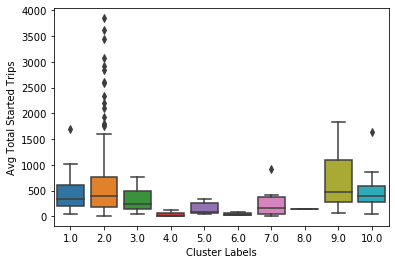

In [160]:
boxPlot = sns.boxplot(x=BayWheelsStationsClustered_TotalStartedTrips_MayThruAugust19_nan_Removed_Avg['Cluster Labels'],\
                 y=BayWheelsStationsClustered_TotalStartedTrips_MayThruAugust19_nan_Removed_Avg['Avg Total Started Trips'])

In [165]:
BayWheelsStationsClustered_TotalStartedTrips_MayThruAugust19_nan_Removed_Avg.head()

,Station ID,Station Name,Station Latitude,Station Longitude,Cluster Labels,Total Started Trips - May 19,Total Started Trips - June 19,Total Started Trips - July 19,Total Started Trips - August 19,Avg Total Started Trips
0,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,2.0,2760.0,2862.0,3029.0,3009.0,2915.0
1,4.0,Cyril Magnin St at Ellis St,37.785881,-122.408915,2.0,542.0,553.0,544.0,536.0,544.0
2,5.0,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2.0,2549.0,2591.0,2606.0,2582.0,2582.0
3,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,2.0,889.0,855.0,912.0,812.0,867.0
4,8.0,The Embarcadero at Vallejo St,37.799953,-122.398525,2.0,878.0,974.0,1083.0,931.0,966.0


### Count of outliers in cluster 1

In [168]:
cluster_1_avg_Total_list=BayWheelsStationsClustered_TotalStartedTrips_MayThruAugust19_nan_Removed_Avg[\
BayWheelsStationsClustered_TotalStartedTrips_MayThruAugust19_nan_Removed_Avg['Cluster Labels']==1]['Avg Total Started Trips']

In [170]:
np.median(cluster_1_avg_Total_list)

334.0

In [178]:
Cluster_1_Maximum=np.percentile(cluster_1_avg_Total_list,[75])+ 1.5*(np.percentile(cluster_1_avg_Total_list,[75])- np.percentile(cluster_1_avg_Total_list,[25]))

In [187]:
Cluster_1_outlier_count=BayWheelsStationsClustered_TotalStartedTrips_MayThruAugust19_nan_Removed_Avg[\
BayWheelsStationsClustered_TotalStartedTrips_MayThruAugust19_nan_Removed_Avg['Cluster Labels']==1][['Avg Total Started Trips']] 

In [199]:
Cluster_1_outlier_count[Cluster_1_outlier_count['Avg Total Started Trips']>float(Cluster_1_Maximum)]

,Avg Total Started Trips
19,1687.0


### Count of outliers in cluster 2

In [201]:
cluster_2_avg_Total_list=BayWheelsStationsClustered_TotalStartedTrips_MayThruAugust19_nan_Removed_Avg[\
BayWheelsStationsClustered_TotalStartedTrips_MayThruAugust19_nan_Removed_Avg['Cluster Labels']==2]['Avg Total Started Trips']

In [202]:
np.median(cluster_2_avg_Total_list)

393.0

In [207]:
Cluster_2_Maximum=np.percentile(cluster_2_avg_Total_list,[75])+ 1.5*(np.percentile(cluster_2_avg_Total_list,[75])- np.percentile(cluster_2_avg_Total_list,[25]))

In [208]:
Cluster_2_outlier_count=BayWheelsStationsClustered_TotalStartedTrips_MayThruAugust19_nan_Removed_Avg[\
BayWheelsStationsClustered_TotalStartedTrips_MayThruAugust19_nan_Removed_Avg['Cluster Labels']==2][['Avg Total Started Trips']] 

In [211]:
(Cluster_2_outlier_count[Cluster_2_outlier_count['Avg Total Started Trips']>float(Cluster_2_Maximum)]).shape

(15, 1)

### Count of outliers in cluster 7

In [213]:
cluster_7_avg_Total_list=BayWheelsStationsClustered_TotalStartedTrips_MayThruAugust19_nan_Removed_Avg[\
BayWheelsStationsClustered_TotalStartedTrips_MayThruAugust19_nan_Removed_Avg['Cluster Labels']==7]['Avg Total Started Trips']

In [214]:
Cluster_7_Maximum=np.percentile(cluster_7_avg_Total_list,[75])+ 1.5*(np.percentile(cluster_7_avg_Total_list,[75])- np.percentile(cluster_7_avg_Total_list,[25]))

In [215]:
Cluster_7_outlier_count=BayWheelsStationsClustered_TotalStartedTrips_MayThruAugust19_nan_Removed_Avg[\
BayWheelsStationsClustered_TotalStartedTrips_MayThruAugust19_nan_Removed_Avg['Cluster Labels']==7][['Avg Total Started Trips']] 

In [216]:
(Cluster_7_outlier_count[Cluster_7_outlier_count['Avg Total Started Trips']>float(Cluster_7_Maximum)]).shape

(1, 1)

### Count of outliers in cluster 10

In [217]:
cluster_10_avg_Total_list=BayWheelsStationsClustered_TotalStartedTrips_MayThruAugust19_nan_Removed_Avg[\
BayWheelsStationsClustered_TotalStartedTrips_MayThruAugust19_nan_Removed_Avg['Cluster Labels']==10]['Avg Total Started Trips']

In [218]:
Cluster_10_Maximum=np.percentile(cluster_10_avg_Total_list,[75])+ 1.5*(np.percentile(cluster_10_avg_Total_list,[75])- np.percentile(cluster_10_avg_Total_list,[25]))

In [219]:
Cluster_10_outlier_count=BayWheelsStationsClustered_TotalStartedTrips_MayThruAugust19_nan_Removed_Avg[\
BayWheelsStationsClustered_TotalStartedTrips_MayThruAugust19_nan_Removed_Avg['Cluster Labels']==10][['Avg Total Started Trips']] 

In [220]:
(Cluster_10_outlier_count[Cluster_10_outlier_count['Avg Total Started Trips']>float(Cluster_10_Maximum)]).shape

(1, 1)

# San Francisco Morning Rush Our, 7:00 AM - 9:00 AM, Trip Count Analysis

In [221]:
from datetime import datetime

## Started Trips

### May 2019

In [222]:
Morning_Rush_Our_Analysis_May19_Started_Trips= pd.DataFrame(df_BwayWheels_TripData_May19.groupby(['start_station_id']))

In [223]:
Morning_Rush_Our_Analysis_May19_Started_Trips

,0,1
0,3.0,duration_sec start_time...
1,4.0,duration_sec start_time...
2,5.0,duration_sec start_time...
3,6.0,duration_sec start_time...
4,7.0,duration_sec start_time...
...,...,...
361,423.0,duration_sec start_time ...
362,424.0,duration_sec start_time...
363,425.0,duration_sec start_time ...
364,426.0,duration_sec start_time ...


In [224]:
Morning_Rush_Our_Analysis_May19_Started_Trips = pd.concat([Morning_Rush_Our_Analysis_May19_Started_Trips,\
           pd.DataFrame(np.zeros((len(Morning_Rush_Our_Analysis_May19_Started_Trips),2)))],\
         axis=1, ignore_index=True)

In [225]:
Morning_Rush_Our_Analysis_May19_Started_Trips.columns= ['Stations ID','Trips Started at the Station ID',\
                                               'Count of Morning Rush Our Trips - May 19', 'Count of Total Started Trips - May 19']

In [226]:
Morning_Rush_Our_Analysis_May19_Started_Trips                                

,Stations ID,Trips Started at the Station ID,Count of Morning Rush Our Trips - May 19,Count of Total Started Trips - May 19
0,3.0,duration_sec start_time...,0.0,0.0
1,4.0,duration_sec start_time...,0.0,0.0
2,5.0,duration_sec start_time...,0.0,0.0
3,6.0,duration_sec start_time...,0.0,0.0
4,7.0,duration_sec start_time...,0.0,0.0
...,...,...,...,...
361,423.0,duration_sec start_time ...,0.0,0.0
362,424.0,duration_sec start_time...,0.0,0.0
363,425.0,duration_sec start_time ...,0.0,0.0
364,426.0,duration_sec start_time ...,0.0,0.0


In [227]:
for i in range(0,len(Morning_Rush_Our_Analysis_May19_Started_Trips)):
    a = Morning_Rush_Our_Analysis_May19_Started_Trips.iloc[i,1].reset_index()
    a_morningRushOurTrips=0
    for j in range(0,len(a)):
        tripTime=datetime.time(datetime.strptime(a.loc[j,'start_time'],'%Y-%m-%d %H:%M:%S.%f'))
        if tripTime >= datetime.time(datetime.strptime('7:00:00', '%H:%M:%S')) \
        and tripTime <= datetime.time(datetime.strptime('9:00:00', '%H:%M:%S')):
            a_morningRushOurTrips +=1
    Morning_Rush_Our_Analysis_May19_Started_Trips.loc[i,'Count of Total Started Trips - May 19'] = len(a)
    Morning_Rush_Our_Analysis_May19_Started_Trips.loc[i,'Count of Morning Rush Our Trips - May 19']= a_morningRushOurTrips
         

In [228]:
Morning_Rush_Our_Analysis_May19_Started_Trips

,Stations ID,Trips Started at the Station ID,Count of Morning Rush Our Trips - May 19,Count of Total Started Trips - May 19
0,3.0,duration_sec start_time...,165.0,2760.0
1,4.0,duration_sec start_time...,78.0,542.0
2,5.0,duration_sec start_time...,278.0,2549.0
3,6.0,duration_sec start_time...,289.0,2349.0
4,7.0,duration_sec start_time...,28.0,889.0
...,...,...,...,...
361,423.0,duration_sec start_time ...,0.0,14.0
362,424.0,duration_sec start_time...,12.0,138.0
363,425.0,duration_sec start_time ...,2.0,13.0
364,426.0,duration_sec start_time ...,2.0,17.0


### June 2019

In [229]:
Morning_Rush_Our_Analysis_June19_Started_Trips= pd.DataFrame(df_BwayWheels_TripData_June19.groupby(['start_station_id']))

In [230]:
Morning_Rush_Our_Analysis_June19_Started_Trips

,0,1
0,3.0,duration_sec start_time...
1,4.0,duration_sec start_time...
2,5.0,duration_sec start_time...
3,6.0,duration_sec start_time...
4,7.0,duration_sec start_time...
...,...,...
368,427.0,duration_sec start_time...
369,431.0,duration_sec start_time...
370,433.0,duration_sec start_time...
371,440.0,duration_sec start_time ...


In [231]:
Morning_Rush_Our_Analysis_June19_Started_Trips = pd.concat([Morning_Rush_Our_Analysis_June19_Started_Trips,\
           pd.DataFrame(np.zeros((len(Morning_Rush_Our_Analysis_June19_Started_Trips),2)))],\
         axis=1, ignore_index=True)

In [232]:
Morning_Rush_Our_Analysis_June19_Started_Trips

,0,1,2,3
0,3.0,duration_sec start_time...,0.0,0.0
1,4.0,duration_sec start_time...,0.0,0.0
2,5.0,duration_sec start_time...,0.0,0.0
3,6.0,duration_sec start_time...,0.0,0.0
4,7.0,duration_sec start_time...,0.0,0.0
...,...,...,...,...
368,427.0,duration_sec start_time...,0.0,0.0
369,431.0,duration_sec start_time...,0.0,0.0
370,433.0,duration_sec start_time...,0.0,0.0
371,440.0,duration_sec start_time ...,0.0,0.0


In [233]:
Morning_Rush_Our_Analysis_June19_Started_Trips.columns= ['Stations ID','Trips Started at the Station ID',\
                                               'Count of Morning Rush Our Trips - June 19', 'Count of Total Started Trips - June 19']

In [234]:
Morning_Rush_Our_Analysis_June19_Started_Trips

,Stations ID,Trips Started at the Station ID,Count of Morning Rush Our Trips - June 19,Count of Total Started Trips - June 19
0,3.0,duration_sec start_time...,0.0,0.0
1,4.0,duration_sec start_time...,0.0,0.0
2,5.0,duration_sec start_time...,0.0,0.0
3,6.0,duration_sec start_time...,0.0,0.0
4,7.0,duration_sec start_time...,0.0,0.0
...,...,...,...,...
368,427.0,duration_sec start_time...,0.0,0.0
369,431.0,duration_sec start_time...,0.0,0.0
370,433.0,duration_sec start_time...,0.0,0.0
371,440.0,duration_sec start_time ...,0.0,0.0


In [235]:
for i in range(0,len(Morning_Rush_Our_Analysis_June19_Started_Trips)):
    a = Morning_Rush_Our_Analysis_June19_Started_Trips.iloc[i,1].reset_index()
    a_morningRushOurTrips=0
    for j in range(0,len(a)):
        try:
            tripTime=datetime.time(datetime.strptime(a.loc[j,'start_time'],'%Y-%m-%d %H:%M:%S.%f'))
        except:
            tripTime=datetime.time(datetime.strptime(a.loc[j,'start_time'],'%Y-%m-%d %H:%M:%S'))
        if tripTime >= datetime.time(datetime.strptime('7:00:00', '%H:%M:%S')) \
        and tripTime <= datetime.time(datetime.strptime('9:00:00', '%H:%M:%S')):
            a_morningRushOurTrips +=1
    Morning_Rush_Our_Analysis_June19_Started_Trips.loc[i,'Count of Total Started Trips - June 19'] = len(a)
    Morning_Rush_Our_Analysis_June19_Started_Trips.loc[i,'Count of Morning Rush Our Trips - June 19']= a_morningRushOurTrips
         

In [236]:
Morning_Rush_Our_Analysis_June19_Started_Trips

,Stations ID,Trips Started at the Station ID,Count of Morning Rush Our Trips - June 19,Count of Total Started Trips - June 19
0,3.0,duration_sec start_time...,212.0,2862.0
1,4.0,duration_sec start_time...,96.0,553.0
2,5.0,duration_sec start_time...,241.0,2591.0
3,6.0,duration_sec start_time...,263.0,2568.0
4,7.0,duration_sec start_time...,11.0,855.0
...,...,...,...,...
368,427.0,duration_sec start_time...,2.0,17.0
369,431.0,duration_sec start_time...,4.0,40.0
370,433.0,duration_sec start_time...,22.0,68.0
371,440.0,duration_sec start_time ...,25.0,129.0


### July 2019

In [237]:
Morning_Rush_Our_Analysis_July19_Started_Trips= pd.DataFrame(df_BwayWheels_TripData_July19.groupby(['start_station_id']))

In [238]:
Morning_Rush_Our_Analysis_July19_Started_Trips

,0,1
0,3.0,duration_sec start_time...
1,4.0,duration_sec start_time...
2,5.0,duration_sec start_time...
3,6.0,duration_sec start_time...
4,7.0,duration_sec start_time...
...,...,...
368,428.0,duration_sec start_time ...
369,431.0,duration_sec start_time...
370,433.0,duration_sec start_time...
371,440.0,duration_sec start_time...


In [239]:
Morning_Rush_Our_Analysis_July19_Started_Trips = pd.concat([Morning_Rush_Our_Analysis_July19_Started_Trips,\
           pd.DataFrame(np.zeros((len(Morning_Rush_Our_Analysis_July19_Started_Trips),2)))],\
         axis=1, ignore_index=True)

In [240]:
Morning_Rush_Our_Analysis_July19_Started_Trips

,0,1,2,3
0,3.0,duration_sec start_time...,0.0,0.0
1,4.0,duration_sec start_time...,0.0,0.0
2,5.0,duration_sec start_time...,0.0,0.0
3,6.0,duration_sec start_time...,0.0,0.0
4,7.0,duration_sec start_time...,0.0,0.0
...,...,...,...,...
368,428.0,duration_sec start_time ...,0.0,0.0
369,431.0,duration_sec start_time...,0.0,0.0
370,433.0,duration_sec start_time...,0.0,0.0
371,440.0,duration_sec start_time...,0.0,0.0


In [241]:
Morning_Rush_Our_Analysis_July19_Started_Trips.columns= ['Stations ID','Trips Started at the Station ID',\
                                               'Count of Morning Rush Our Trips - July 19', 'Count of Total Started Trips - July 19']

In [242]:
Morning_Rush_Our_Analysis_July19_Started_Trips

,Stations ID,Trips Started at the Station ID,Count of Morning Rush Our Trips - July 19,Count of Total Started Trips - July 19
0,3.0,duration_sec start_time...,0.0,0.0
1,4.0,duration_sec start_time...,0.0,0.0
2,5.0,duration_sec start_time...,0.0,0.0
3,6.0,duration_sec start_time...,0.0,0.0
4,7.0,duration_sec start_time...,0.0,0.0
...,...,...,...,...
368,428.0,duration_sec start_time ...,0.0,0.0
369,431.0,duration_sec start_time...,0.0,0.0
370,433.0,duration_sec start_time...,0.0,0.0
371,440.0,duration_sec start_time...,0.0,0.0


In [243]:
for i in range(0,len(Morning_Rush_Our_Analysis_July19_Started_Trips)):
    a = Morning_Rush_Our_Analysis_July19_Started_Trips.iloc[i,1].reset_index()
    a_morningRushOurTrips=0
    for j in range(0,len(a)):
        try:
            tripTime=datetime.time(datetime.strptime(a.loc[j,'start_time'],'%Y-%m-%d %H:%M:%S.%f'))
        except:
            tripTime=datetime.time(datetime.strptime(a.loc[j,'start_time'],'%Y-%m-%d %H:%M:%S'))
        if tripTime >= datetime.time(datetime.strptime('7:00:00', '%H:%M:%S')) \
        and tripTime <= datetime.time(datetime.strptime('9:00:00', '%H:%M:%S')):
            a_morningRushOurTrips +=1
    Morning_Rush_Our_Analysis_July19_Started_Trips.loc[i,'Count of Total Started Trips - July 19'] = len(a)
    Morning_Rush_Our_Analysis_July19_Started_Trips.loc[i,'Count of Morning Rush Our Trips - July 19']= a_morningRushOurTrips
         

In [244]:
Morning_Rush_Our_Analysis_July19_Started_Trips

,Stations ID,Trips Started at the Station ID,Count of Morning Rush Our Trips - July 19,Count of Total Started Trips - July 19
0,3.0,duration_sec start_time...,239.0,3029.0
1,4.0,duration_sec start_time...,79.0,544.0
2,5.0,duration_sec start_time...,238.0,2606.0
3,6.0,duration_sec start_time...,273.0,2467.0
4,7.0,duration_sec start_time...,22.0,912.0
...,...,...,...,...
368,428.0,duration_sec start_time ...,0.0,5.0
369,431.0,duration_sec start_time...,4.0,64.0
370,433.0,duration_sec start_time...,29.0,75.0
371,440.0,duration_sec start_time...,98.0,306.0


### August 2019

In [245]:
Morning_Rush_Our_Analysis_August19_Started_Trips= pd.DataFrame(df_BwayWheels_TripData_August19.groupby(['start_station_id']))

In [246]:
Morning_Rush_Our_Analysis_August19_Started_Trips

,0,1
0,3,duration_sec start_time...
1,4,duration_sec start_time...
2,5,duration_sec start_time...
3,6,duration_sec start_time...
4,7,duration_sec start_time...
...,...,...
372,440,duration_sec start_time...
373,443,duration_sec start_time...
374,445,duration_sec start_time...
375,446,duration_sec start_time...


In [247]:
Morning_Rush_Our_Analysis_August19_Started_Trips = pd.concat([Morning_Rush_Our_Analysis_August19_Started_Trips,\
           pd.DataFrame(np.zeros((len(Morning_Rush_Our_Analysis_August19_Started_Trips),2)))],\
         axis=1, ignore_index=True)

In [248]:
Morning_Rush_Our_Analysis_August19_Started_Trips

,0,1,2,3
0,3,duration_sec start_time...,0.0,0.0
1,4,duration_sec start_time...,0.0,0.0
2,5,duration_sec start_time...,0.0,0.0
3,6,duration_sec start_time...,0.0,0.0
4,7,duration_sec start_time...,0.0,0.0
...,...,...,...,...
372,440,duration_sec start_time...,0.0,0.0
373,443,duration_sec start_time...,0.0,0.0
374,445,duration_sec start_time...,0.0,0.0
375,446,duration_sec start_time...,0.0,0.0


In [249]:
Morning_Rush_Our_Analysis_August19_Started_Trips.columns= ['Stations ID','Trips Started at the Station ID',\
                                               'Count of Morning Rush Our Trips - August 19', 'Count of Total Started Trips - August 19']

In [250]:
for i in range(0,len(Morning_Rush_Our_Analysis_August19_Started_Trips)):
    a = Morning_Rush_Our_Analysis_August19_Started_Trips.iloc[i,1].reset_index()
    a_morningRushOurTrips=0
    for j in range(0,len(a)):
        try:
            tripTime=datetime.time(datetime.strptime(a.loc[j,'start_time'],'%Y-%m-%d %H:%M:%S.%f'))
        except:
            tripTime=datetime.time(datetime.strptime(a.loc[j,'start_time'],'%Y-%m-%d %H:%M:%S'))
        if tripTime >= datetime.time(datetime.strptime('7:00:00', '%H:%M:%S')) \
        and tripTime <= datetime.time(datetime.strptime('9:00:00', '%H:%M:%S')):
            a_morningRushOurTrips +=1
    Morning_Rush_Our_Analysis_August19_Started_Trips.loc[i,'Count of Total Started Trips - August 19'] = len(a)
    Morning_Rush_Our_Analysis_August19_Started_Trips.loc[i,'Count of Morning Rush Our Trips - August 19']= a_morningRushOurTrips
         

In [251]:
Morning_Rush_Our_Analysis_August19_Started_Trips

,Stations ID,Trips Started at the Station ID,Count of Morning Rush Our Trips - August 19,Count of Total Started Trips - August 19
0,3,duration_sec start_time...,253.0,3009.0
1,4,duration_sec start_time...,66.0,536.0
2,5,duration_sec start_time...,270.0,2582.0
3,6,duration_sec start_time...,293.0,2671.0
4,7,duration_sec start_time...,6.0,812.0
...,...,...,...,...
372,440,duration_sec start_time...,89.0,316.0
373,443,duration_sec start_time...,18.0,106.0
374,445,duration_sec start_time...,11.0,389.0
375,446,duration_sec start_time...,9.0,196.0


## Combining All Morning Rush Our Trips of Bay Wheesl Stations in My 2019 Through August 2019

In [252]:
BayWheelsStationsClustered_Morning_Rush_Our_Analysis_MayThruAugust19_Started_Trips = \
StationClustering_merged.iloc[:,0:5]

In [253]:
df_to_merge_RushHourMornigStarted=[Morning_Rush_Our_Analysis_May19_Started_Trips, Morning_Rush_Our_Analysis_June19_Started_Trips,\
            Morning_Rush_Our_Analysis_July19_Started_Trips, Morning_Rush_Our_Analysis_August19_Started_Trips]

In [254]:
# Full Outer hoin of daraframes
for df in df_to_merge_RushHourMornigStarted:
    BayWheelsStationsClustered_Morning_Rush_Our_Analysis_MayThruAugust19_Started_Trips=\
    pd.merge(BayWheelsStationsClustered_Morning_Rush_Our_Analysis_MayThruAugust19_Started_Trips,\
            df, left_on='Station ID', right_on='Stations ID', how='outer')
    BayWheelsStationsClustered_Morning_Rush_Our_Analysis_MayThruAugust19_Started_Trips.dropna(inplace=True)

In [255]:
BayWheelsStationsClustered_Morning_Rush_Our_Analysis_MayThruAugust19_Started_Trips

,Station ID,Station Name,Station Latitude,Station Longitude,Cluster Labels,Stations ID_x,Trips Started at the Station ID_x,Count of Morning Rush Our Trips - May 19,Count of Total Started Trips - May 19,Stations ID_y,...,Count of Morning Rush Our Trips - June 19,Count of Total Started Trips - June 19,Stations ID_x,Trips Started at the Station ID_x,Count of Morning Rush Our Trips - July 19,Count of Total Started Trips - July 19,Stations ID_y,Trips Started at the Station ID_y,Count of Morning Rush Our Trips - August 19,Count of Total Started Trips - August 19
0,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,1.0,3.0,duration_sec start_time...,165.0,2760.0,3.0,...,212.0,2862.0,3.0,duration_sec start_time...,239.0,3029.0,3,duration_sec start_time...,253.0,3009.0
1,4.0,Cyril Magnin St at Ellis St,37.785881,-122.408915,1.0,4.0,duration_sec start_time...,78.0,542.0,4.0,...,96.0,553.0,4.0,duration_sec start_time...,79.0,544.0,4,duration_sec start_time...,66.0,536.0
2,5.0,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,1.0,5.0,duration_sec start_time...,278.0,2549.0,5.0,...,241.0,2591.0,5.0,duration_sec start_time...,238.0,2606.0,5,duration_sec start_time...,270.0,2582.0
3,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,1.0,7.0,duration_sec start_time...,28.0,889.0,7.0,...,11.0,855.0,7.0,duration_sec start_time...,22.0,912.0,7,duration_sec start_time...,6.0,812.0
4,8.0,The Embarcadero at Vallejo St,37.799953,-122.398525,1.0,8.0,duration_sec start_time...,59.0,878.0,8.0,...,45.0,974.0,8.0,duration_sec start_time...,40.0,1083.0,8,duration_sec start_time...,35.0,931.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336,423.0,South San Jose State (7th St at Humboldt St),37.320316,-121.870099,1.0,423.0,duration_sec start_time ...,0.0,14.0,423.0,...,1.0,33.0,423.0,duration_sec start_time...,1.0,27.0,423,duration_sec start_time...,0.0,30.0
337,424.0,Greenwich St at Webster St,37.799208,-122.434122,1.0,424.0,duration_sec start_time...,12.0,138.0,424.0,...,28.0,274.0,424.0,duration_sec start_time...,45.0,287.0,424,duration_sec start_time...,39.0,241.0
338,425.0,Bird Ave at Willow St,37.311284,-121.896325,1.0,425.0,duration_sec start_time ...,2.0,13.0,425.0,...,9.0,46.0,425.0,duration_sec start_time...,4.0,50.0,425,duration_sec start_time...,1.0,31.0
339,426.0,San Carlos St at Meridian Ave,37.323345,-121.913497,1.0,426.0,duration_sec start_time ...,2.0,17.0,426.0,...,20.0,99.0,426.0,duration_sec start_time...,15.0,115.0,426,duration_sec start_time...,24.0,103.0


In [256]:
BayWheelsStationsClustered_Morning_Rush_Our_Analysis_MayThruAugust19_Started_Trips.drop(['Stations ID_y',\
                                                                                         'Trips Started at the Station ID_x',\
                                                                                         'Trips Started at the Station ID_y',\
                                                                                         'Stations ID_x'], axis=1, inplace=True)

In [257]:
BayWheelsStationsClustered_Morning_Rush_Our_Analysis_MayThruAugust19_Started_Trips

,Station ID,Station Name,Station Latitude,Station Longitude,Cluster Labels,Count of Morning Rush Our Trips - May 19,Count of Total Started Trips - May 19,Count of Morning Rush Our Trips - June 19,Count of Total Started Trips - June 19,Count of Morning Rush Our Trips - July 19,Count of Total Started Trips - July 19,Count of Morning Rush Our Trips - August 19,Count of Total Started Trips - August 19
0,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,1.0,165.0,2760.0,212.0,2862.0,239.0,3029.0,253.0,3009.0
1,4.0,Cyril Magnin St at Ellis St,37.785881,-122.408915,1.0,78.0,542.0,96.0,553.0,79.0,544.0,66.0,536.0
2,5.0,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,1.0,278.0,2549.0,241.0,2591.0,238.0,2606.0,270.0,2582.0
3,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,1.0,28.0,889.0,11.0,855.0,22.0,912.0,6.0,812.0
4,8.0,The Embarcadero at Vallejo St,37.799953,-122.398525,1.0,59.0,878.0,45.0,974.0,40.0,1083.0,35.0,931.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
336,423.0,South San Jose State (7th St at Humboldt St),37.320316,-121.870099,1.0,0.0,14.0,1.0,33.0,1.0,27.0,0.0,30.0
337,424.0,Greenwich St at Webster St,37.799208,-122.434122,1.0,12.0,138.0,28.0,274.0,45.0,287.0,39.0,241.0
338,425.0,Bird Ave at Willow St,37.311284,-121.896325,1.0,2.0,13.0,9.0,46.0,4.0,50.0,1.0,31.0
339,426.0,San Carlos St at Meridian Ave,37.323345,-121.913497,1.0,2.0,17.0,20.0,99.0,15.0,115.0,24.0,103.0


In [258]:
BayWheelsStationsClustered_Morning_Rush_Our_Analysis_MayThruAugust19_Started_Trips['Avg Count of Morning Rush Our Trips'] =\
BayWheelsStationsClustered_Morning_Rush_Our_Analysis_MayThruAugust19_Started_Trips[['Count of Morning Rush Our Trips - May 19',\
                                                                                   'Count of Morning Rush Our Trips - June 19',\
                                                                                   'Count of Morning Rush Our Trips - July 19',\
                                                                                   'Count of Morning Rush Our Trips - August 19']].mean(axis=1).round()

In [259]:
BayWheelsStationsClustered_Morning_Rush_Our_Analysis_MayThruAugust19_Started_Trips['Avg Count of Total Started Trips'] =\
BayWheelsStationsClustered_Morning_Rush_Our_Analysis_MayThruAugust19_Started_Trips[['Count of Total Started Trips - May 19',\
                                                                                   'Count of Total Started Trips - June 19',\
                                                                                   'Count of Total Started Trips - July 19',\
                                                                                   'Count of Total Started Trips - August 19']].mean(axis=1).round()

In [260]:
BayWheelsStationsClustered_Morning_Rush_Our_Analysis_MayThruAugust19_Started_Trips

,Station ID,Station Name,Station Latitude,Station Longitude,Cluster Labels,Count of Morning Rush Our Trips - May 19,Count of Total Started Trips - May 19,Count of Morning Rush Our Trips - June 19,Count of Total Started Trips - June 19,Count of Morning Rush Our Trips - July 19,Count of Total Started Trips - July 19,Count of Morning Rush Our Trips - August 19,Count of Total Started Trips - August 19,Avg Count of Morning Rush Our Trips,Avg Count of Total Started Trips
0,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,1.0,165.0,2760.0,212.0,2862.0,239.0,3029.0,253.0,3009.0,217.0,2915.0
1,4.0,Cyril Magnin St at Ellis St,37.785881,-122.408915,1.0,78.0,542.0,96.0,553.0,79.0,544.0,66.0,536.0,80.0,544.0
2,5.0,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,1.0,278.0,2549.0,241.0,2591.0,238.0,2606.0,270.0,2582.0,257.0,2582.0
3,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,1.0,28.0,889.0,11.0,855.0,22.0,912.0,6.0,812.0,17.0,867.0
4,8.0,The Embarcadero at Vallejo St,37.799953,-122.398525,1.0,59.0,878.0,45.0,974.0,40.0,1083.0,35.0,931.0,45.0,966.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336,423.0,South San Jose State (7th St at Humboldt St),37.320316,-121.870099,1.0,0.0,14.0,1.0,33.0,1.0,27.0,0.0,30.0,0.0,26.0
337,424.0,Greenwich St at Webster St,37.799208,-122.434122,1.0,12.0,138.0,28.0,274.0,45.0,287.0,39.0,241.0,31.0,235.0
338,425.0,Bird Ave at Willow St,37.311284,-121.896325,1.0,2.0,13.0,9.0,46.0,4.0,50.0,1.0,31.0,4.0,35.0
339,426.0,San Carlos St at Meridian Ave,37.323345,-121.913497,1.0,2.0,17.0,20.0,99.0,15.0,115.0,24.0,103.0,15.0,84.0


In [261]:
BayWheelsStationsClustered_Morning_Rush_Our_Analysis_MayThruAugust19_Started_Trips[BayWheelsStationsClustered_Morning_Rush_Our_Analysis_MayThruAugust19_Started_Trips['Cluster Labels']==2]['Avg Count of Morning Rush Our Trips'].median()

22.0

In [262]:
BayWheelsStationsClustered_Morning_Rush_Our_Analysis_MayThruAugust19_Started_Trips[BayWheelsStationsClustered_Morning_Rush_Our_Analysis_MayThruAugust19_Started_Trips['Cluster Labels']==0]['Avg Count of Morning Rush Our Trips'].median()

50.0

In [263]:
BayWheelsStationsClustered_Morning_Rush_Our_Analysis_MayThruAugust19_Started_Trips[BayWheelsStationsClustered_Morning_Rush_Our_Analysis_MayThruAugust19_Started_Trips['Cluster Labels']==1]['Avg Count of Morning Rush Our Trips'].median()

64.0

In [265]:
BayWheelsStationsClustered_Morning_Rush_Our_Analysis_MayThruAugust19_Started_Trips['Cluster Labels']+=1

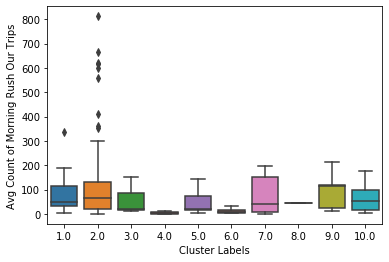

In [266]:
boxPlott = sns.boxplot(x=BayWheelsStationsClustered_Morning_Rush_Our_Analysis_MayThruAugust19_Started_Trips['Cluster Labels'],\
                 y=BayWheelsStationsClustered_Morning_Rush_Our_Analysis_MayThruAugust19_Started_Trips['Avg Count of Morning Rush Our Trips'])

### Count of outliers of Cluster 1

In [267]:
cluster_1_avg_morning_rush_hour_list=BayWheelsStationsClustered_Morning_Rush_Our_Analysis_MayThruAugust19_Started_Trips[\
BayWheelsStationsClustered_Morning_Rush_Our_Analysis_MayThruAugust19_Started_Trips['Cluster Labels']==1]['Avg Count of Morning Rush Our Trips']

In [268]:
Cluster_1_Maximum_morning_rush_hour=np.percentile(cluster_1_avg_morning_rush_hour_list,[75])+ 1.5*(np.percentile(cluster_1_avg_morning_rush_hour_list,[75])- np.percentile(cluster_1_avg_morning_rush_hour_list,[25]))

In [269]:
cluster_1_avg_morning_rush_hour_list_outlier_count=BayWheelsStationsClustered_Morning_Rush_Our_Analysis_MayThruAugust19_Started_Trips[\
BayWheelsStationsClustered_Morning_Rush_Our_Analysis_MayThruAugust19_Started_Trips['Cluster Labels']==1][['Avg Count of Morning Rush Our Trips']] 

In [270]:
(cluster_1_avg_morning_rush_hour_list_outlier_count[cluster_1_avg_morning_rush_hour_list_outlier_count['Avg Count of Morning Rush Our Trips']>float(Cluster_1_Maximum_morning_rush_hour)]).shape

(1, 1)

### Count of outliers of Cluster 2

In [271]:
cluster_2_avg_morning_rush_hour_list=BayWheelsStationsClustered_Morning_Rush_Our_Analysis_MayThruAugust19_Started_Trips[\
BayWheelsStationsClustered_Morning_Rush_Our_Analysis_MayThruAugust19_Started_Trips['Cluster Labels']==2]['Avg Count of Morning Rush Our Trips']

In [272]:
Cluster_2_Maximum_morning_rush_hour=np.percentile(cluster_2_avg_morning_rush_hour_list,[75])+ 1.5*(np.percentile(cluster_1_avg_morning_rush_hour_list,[75])- np.percentile(cluster_2_avg_morning_rush_hour_list,[25]))

In [273]:
cluster_2_avg_morning_rush_hour_list_outlier_count=BayWheelsStationsClustered_Morning_Rush_Our_Analysis_MayThruAugust19_Started_Trips[\
BayWheelsStationsClustered_Morning_Rush_Our_Analysis_MayThruAugust19_Started_Trips['Cluster Labels']==2][['Avg Count of Morning Rush Our Trips']] 

In [274]:
(cluster_2_avg_morning_rush_hour_list_outlier_count[cluster_2_avg_morning_rush_hour_list_outlier_count['Avg Count of Morning Rush Our Trips']>float(Cluster_2_Maximum_morning_rush_hour)]).shape

(13, 1)